Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 16, 16, 27)]      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 1024)      28672     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 9)         9225      
Total params: 37,897
Trainable params: 37,897
Non-trainable params: 0
_________________________________________________________________
Target:


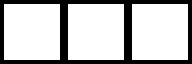

Sample run:


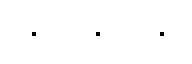

Training...
Stopping due to time-out
Target:


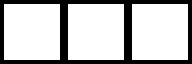

Sample run:


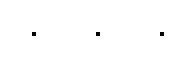


 step: 15, loss: 0.183, log10(loss): -0.738

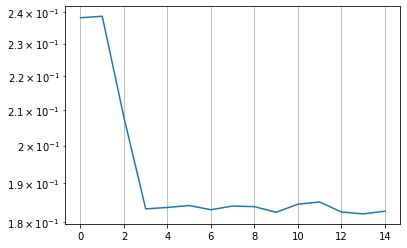

 -- saved parameters
Training...
Stopping due to time-out
Target:


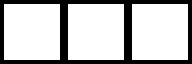

Sample run:


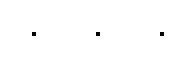


 step: 36, loss: 0.152, log10(loss): -0.819

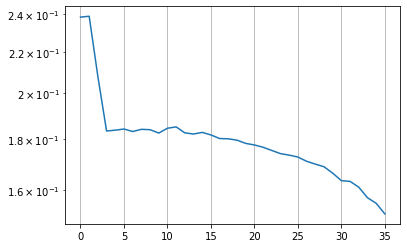

 -- saved parameters
Training...
Stopping due to time-out
Target:


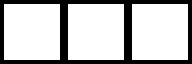

Sample run:


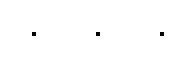


 step: 57, loss: 0.047, log10(loss): -1.326

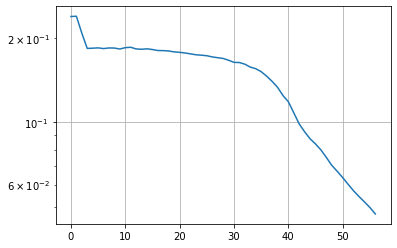

 -- saved parameters
Training...
Stopping due to time-out
Target:


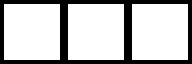

Sample run:


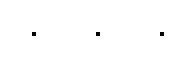


 step: 77, loss: 0.002, log10(loss): -2.760

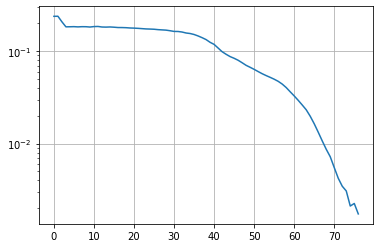

 -- saved parameters
Training...
Stopping due to time-out
Target:


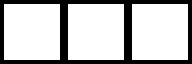

Sample run:


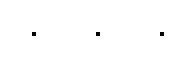


 step: 98, loss: 0.000, log10(loss): -4.199

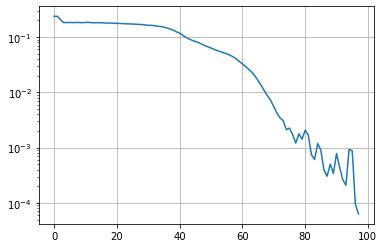

 -- saved parameters
Training...
Stopping due to time-out
Target:


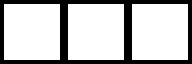

Sample run:


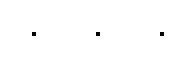


 step: 119, loss: 0.001, log10(loss): -3.225

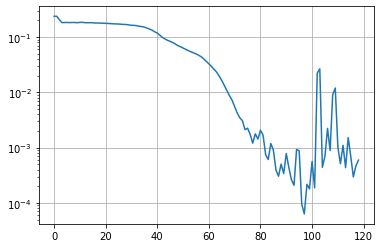

 -- saved parameters
Training...
Stopping due to time-out
Target:


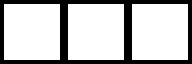

Sample run:


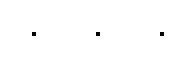


 step: 140, loss: 0.000, log10(loss): -3.885

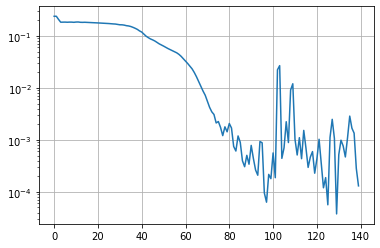

 -- saved parameters
Training...
Stopping due to time-out
Target:


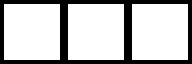

Sample run:


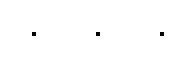


 step: 160, loss: 0.000, log10(loss): -4.303

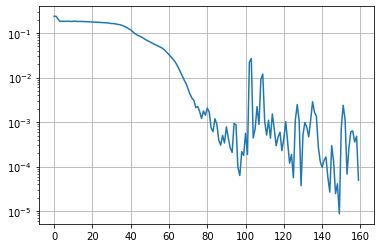

 -- saved parameters
Training...
Stopping due to zero loss
Target:


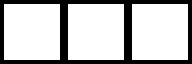

Sample run:


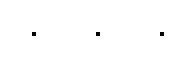


 step: 169, loss: 0.000, log10(loss): -6.355

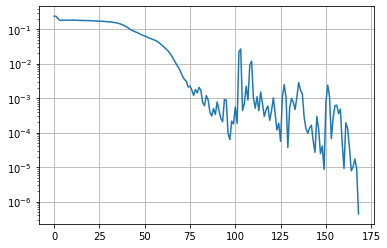

 -- saved parameters


In [13]:
import module1
from importlib import reload
reload(module1)

ca = module1.CellularAutomata(
    img_size=16, 
    channel_count=9,
    layer_counts=[1024],
    perception_kernel=module1.sobel_state_kernel())
ca.noise_range = (0, 0) #(-0.1, 0.1)
ca.conserve_mass = False
ca.edge_strategy = module1.EdgeStrategy.MIRROR

lifetime = 32

x0 = lambda: ca.pointfilled(ca.constfilled(1.0), point_value=0.0)
xf = lambda: ca.bordered(ca.constfilled(1.0), border_value=0.0)
training = module1.init_training(ca, do_load=False, learning_rate=3.0e-4)
training.show_sample_run(x0, xf, lifetime)

while not training.is_done():
    print("Training...")
    training.run(x0, xf, lifetime, max_seconds=5)
    training.show_sample_run(x0, xf, lifetime)
    training.show_loss_history()
    training.save()
    print(" -- saved parameters")